Agenda:
    - correlation
    - linear regression

"Correlation does not imply causation"

Example:

As ice cream sales increase, the rate of drowning deaths increases sharply.
Therefore, ice cream consumption causes drowning.

## 9.1.1 Correlation

When we get data, we want to describe how variables relate to each other. The simplest question we can ask are two variables correlated?

The metric we use for correlation is the Pearson correlation coefficient, which is hard to grasp intuitively from looking at the equation (see https://en.wikipedia.org/wiki/Correlation_and_dependence). Basically, correlation is a measure of how linearly correlated two variables are, and has values between 1 and -1. If the two variables fall on a straight line and the both increase together, then the correlation is 1. If one increases while the other decreases, the correlation is -1. Correlations near zero mean the two variables are not correlated. 

Let's use the movie data we worked with previously to test if budgets and gross earnings are correlated

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

(0, 1000000000.0)

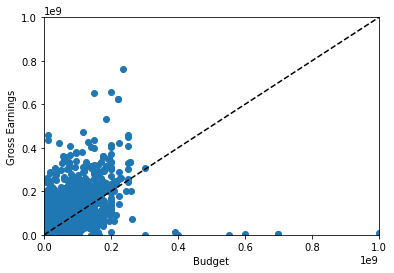

In [3]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Budget'], movies['Gross Earnings'])
plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.1E10])
plt.ylim([0,1E9])

In the above I have added the y=x line to visualize if the gross earnings were above the budget. 
Because many of the data points are on top of each other, it is difficult to assess visually the relationship between the two variables

Note that pandas allows us to get the correlation of the entire dataframe all at once. There are many other packages that will do this as well, including numpy.

In [4]:
corr = movies.corr()
corr
# Budget and Gross earnings are not very correlated, r = 0.10

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


### E1. What does it mean that year and duration are negatively correlated? Plot these two variables togther and explain.

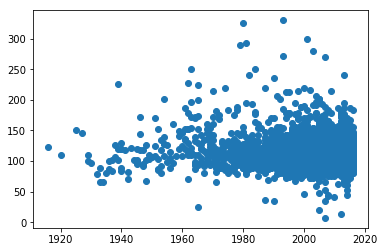

In [5]:
# plot Budget vs Gross Earnings
plt.scatter(movies['Year'], movies['Duration'])




Negative correlation means that when one of the variables increases,
the other one decreases

### E2. Which pairs of variables have the highest correlation? What might explain this?

(0, 300000)

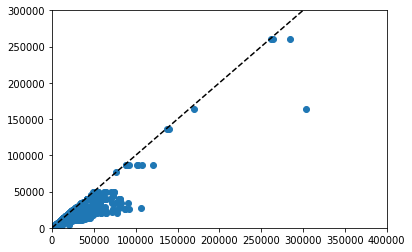

In [6]:
plt.scatter(movies['Facebook Likes - cast Total'], movies['Facebook Likes - Actor 1'])
plt.plot([0,1E10],[0,1E10], 'k--')
plt.xlim(0, 400000)
plt.ylim(0,300000)

The pair with the highest correlation is the one between "Facebook Likes - cast Total" and "Facebook Likes - Actor 1"
probably because most of the cast total likes is coming from the facebook likes of Actor 1

## 9.1.2 Linear regression

See https://en.wikipedia.org/wiki/Linear_regression and http://onlinestatbook.com/2/regression/regression.html for a nice introduction. See https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 for a good intro on the math

Supposed we were convinced that gross earnings were linearly related to budget, i.e. G = a*B +c. To test this, we would fit the scatterplot we made above to a line, which would solve for the coefficients a (slope) and c (intercept) in our linear equation.

The basic idea of linear regression is that one finds the distance of each data point to a line and minimize this (using calculus) to find the best fit line. This is commonly called ordinary least squares, as the distance of the data from the linear model is squared.

Because the movies database has a number of nans in it, it's a bit difficult to work with. Instead, let's do the tutorial here on linear regression using Boston housing data: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This tutorial uses the package scikit-learn

In [7]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

What we want to do here is to determine which variables contribute to housing prices

In [8]:
data?

In [9]:
# information on the data:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


In [11]:
# are room numbers and value correlated?
np.corrcoef(df["RM"], target["MEDV"])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

Text(0, 0.5, 'House value ($1000s)')

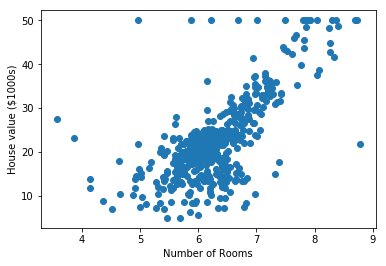

In [12]:
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

### Doing a linear regression using scipy

In [13]:
from scipy import stats

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

this gives us the slope and intercept of the line, the corrlation (r_value)

A low p-value (< 0.05) indicates that the linear regression is a good model

the standard error is the standard deviation of the data from the model (instead of the mean)

In [15]:
slope

9.102108981180306

In [16]:
intercept

-34.67062077643854

In [17]:
r_value
# note this is the same correlation value we got before

0.695359947071539

In [18]:
p_value

2.487228871008377e-74

In [19]:
std_err

0.41902656012134054

Text(0, 0.5, 'House value ($1000s)')

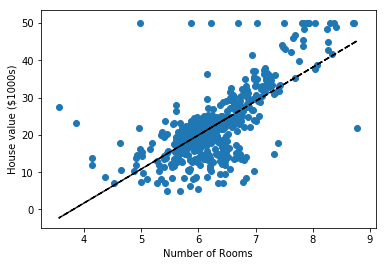

In [20]:
plt.plot(df["RM"], slope*df["RM"]+intercept, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')

In [21]:
stats.linregress?

### Doing a linear regression using statsmodels

See https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

and

https://www.statsmodels.org/dev/index.html

In [22]:
import statsmodels.api as sm

In [23]:
X = df["RM"] # what we think the cost depends on
y = target["MEDV"]

In [24]:
# Note y, the target, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, or rather an intercept of zero

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          3.74e-256
Time:                        21:28:03   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
predictions = model.predict(X) # make the predictions by the model

Text(0, 0.5, 'House value ($1000s)')

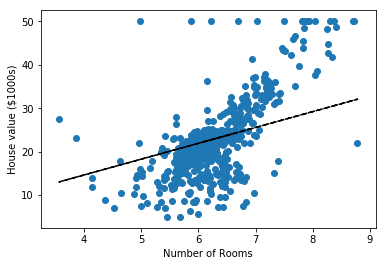

In [27]:
plt.plot(X,predictions, 'k--')
plt.scatter(df["RM"], target["MEDV"])
plt.xlabel('Number of Rooms')
plt.ylabel('House value ($1000s)')
# this is not a very good fit

Note that with statsmodels you can easily do generalized linear regression, i.e. regression with more than one variable: 

y = a*X_1 + b*X_2 + ...

### E3. do the tutorial: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [29]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [30]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [31]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [32]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
boston['MEDV'] = boston_dataset.target

In [34]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\German Torres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


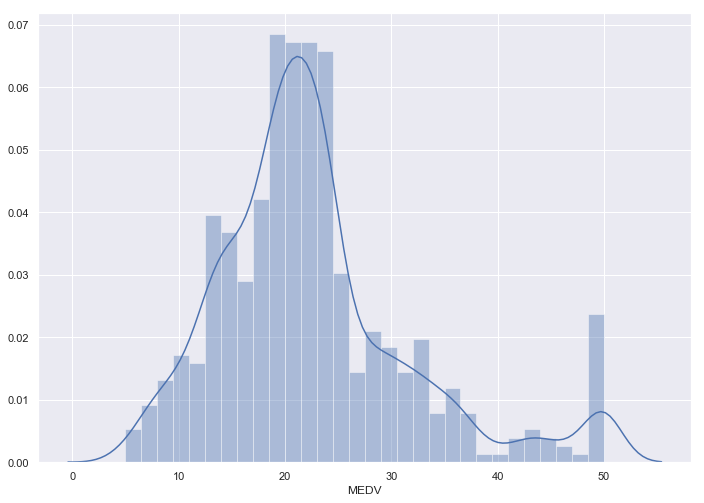

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins = 30)
plt.show()

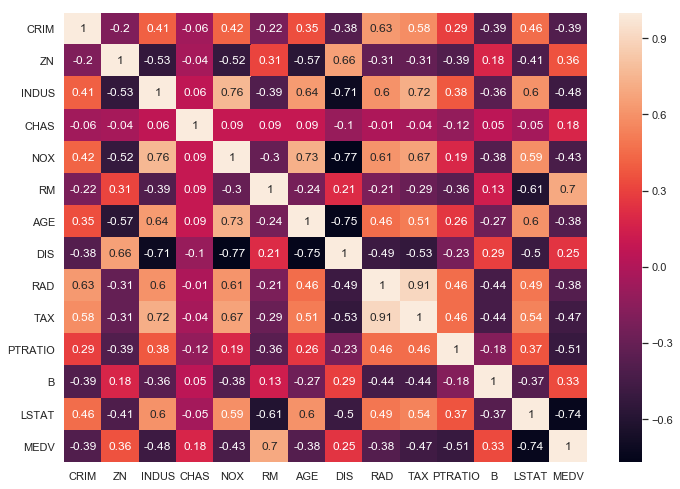

In [36]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)

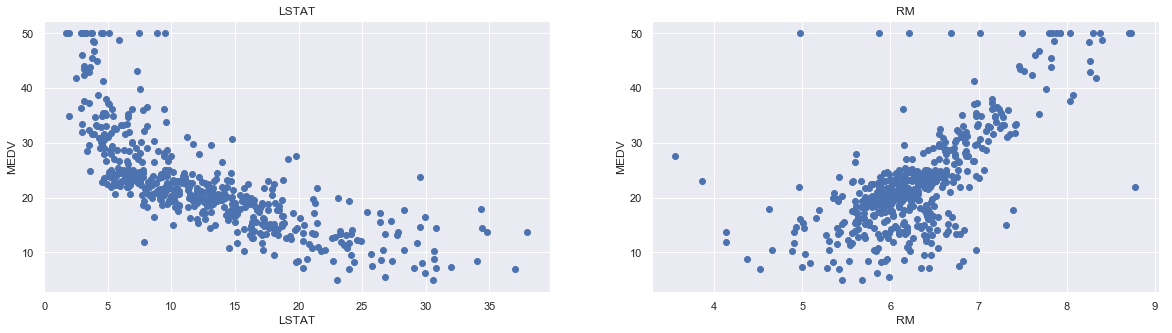

In [37]:
plt.figure(figsize = (20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x= boston[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [38]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ["LSTAT", 'RM'])
Y = boston['MEDV']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


### E4. Following the methods in the tutorial above, do the regression with just the rooms and not the other variable. How does this compare with the scipy result?

This may be helpful is figuring out how to write out the slope and intercept:

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

In [42]:
boston['RM'] = boston_dataset.target
boston['RM']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: RM, Length: 506, dtype: float64

C:\Users\German Torres\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


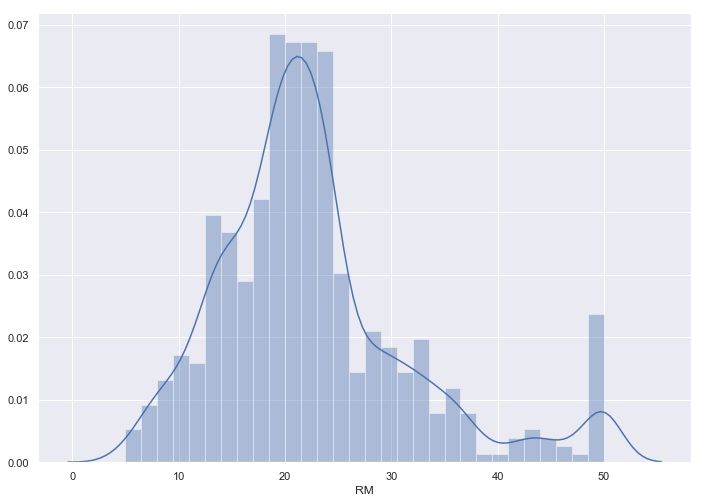

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['RM'], bins = 30)
plt.show()

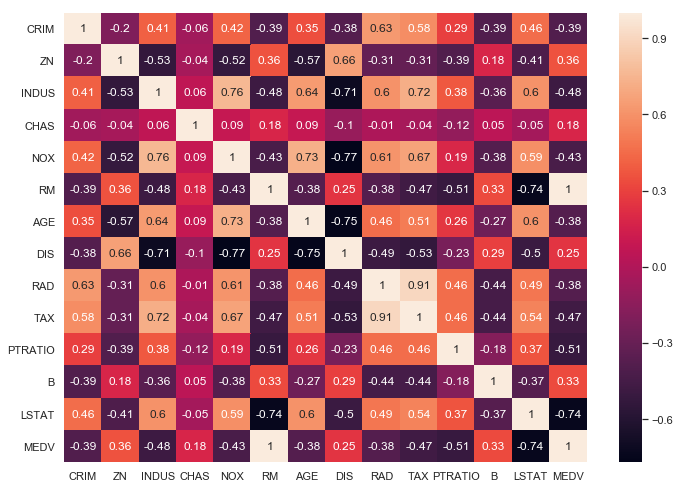

In [44]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)

In [47]:
X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['RM'])
Y = boston['MEDV']

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


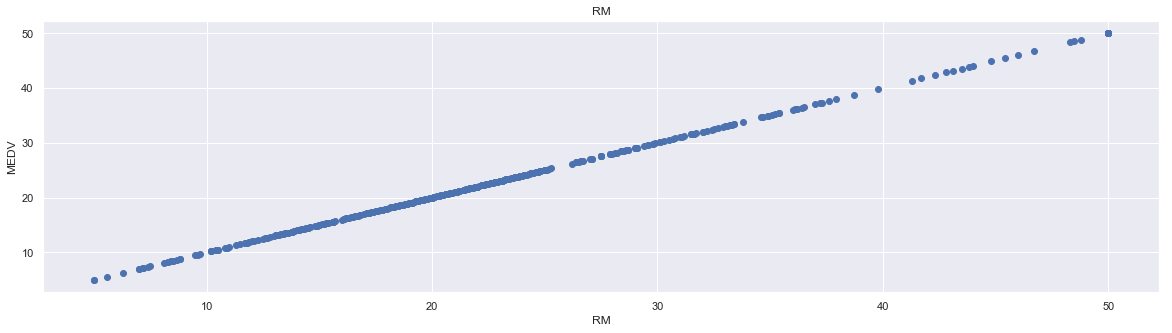

In [50]:
plt.figure(figsize = (20, 5))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x= boston[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

ValueError: x and y must be the same size

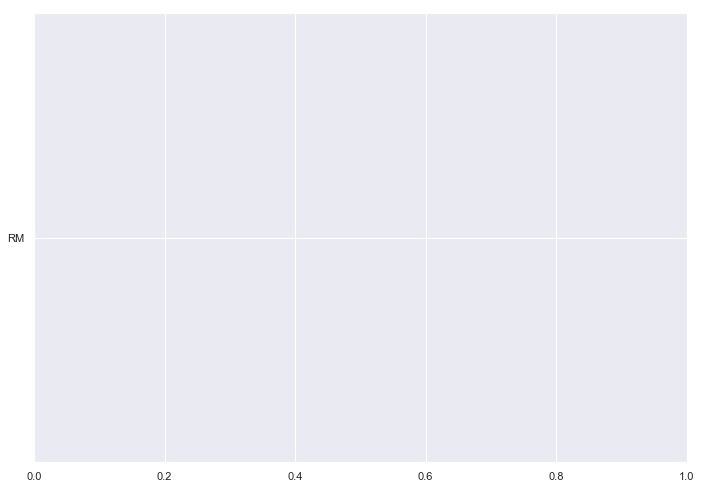